# **EDA**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from wordcloud import WordCloud

## **Importando as bases e analisando os dados**

In [139]:
# Importando
base = pd.read_csv('../Bases/train.csv')

In [140]:
# Informações das colunas
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [141]:
# Estatísticas das colunas numéricas
base.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [142]:
# Estatísticas das colunas não numéricas
base.describe(exclude='number')

,Date,IsHoliday
count,421570,421570
unique,143,2
top,2011-12-23,False
freq,3027,391909


In [143]:
# Valores únicos por coluna
base.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [144]:
# Valores duplicados na base de treino
base.duplicated().sum()

0

In [145]:
# Valores nulos por coluna
base.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [146]:
base.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [147]:
# Linhas e colunas
base.shape

(421570, 5)

#### **Transformando colunas**

In [148]:
# Aplicandoo tipo datetime
base['Date'] = pd.to_datetime(base['Date'], format='%Y-%m-%d')

In [149]:
# 0 para False, 1 para True
base['IsHoliday'] = base['IsHoliday'].apply(lambda x:1 if x == True else 0)

In [150]:
base.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


## **Base de Lojas (stores)**

- **Store** - Loja (1 a 45)
- **Type** - Tipo da loja
- **Size** - Tamanho da loja

In [151]:
lojas = pd.read_csv('../Bases/stores.csv')

In [152]:
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [153]:
lojas.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [154]:
lojas.describe(exclude='number')

,Type
count,45
unique,3
top,A
freq,22


In [155]:
lojas.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [156]:
lojas.duplicated().sum()

0

In [157]:
lojas.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [158]:
lojas.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [159]:
lojas.shape

(45, 3)

#### **Visualizando os tipos de lojas e as quantidades**

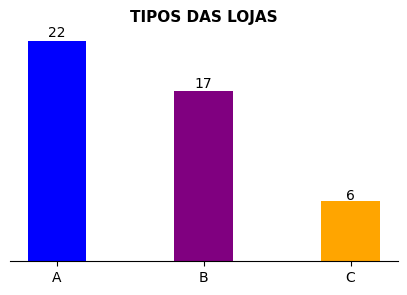

In [160]:
a = lojas.Type.value_counts().sort_index(ascending=True)
w=0.4
fig,ax = plt.subplots(figsize=(5,3))
ax.bar(a.index, a.values, width=w, color=['blue','purple','orange'])
ax.set_title('TIPOS DAS LOJAS', fontweight='bold', fontsize=11)
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
for i in range(3):
    ax.annotate(a.values[i], (a.index[i], a.values[i]+a.values[i] * 0.02), ha='center')
    
plt.savefig("../Imagens/lojas.png")
plt.show()

## **Base de Features**

In [161]:
features = pd.read_csv('../Bases/features.csv')

- **Store** - Loja
- **Date** - Semana
- **Temperature** - Temperatura em °F na região
- **Fuel_Price** - Custo do combustível na região
- **MarkDown1** - Dados anonimizados relacionados a descontos promocionais que o Walmart está realizando.
- **MarkDown2** - Dados anonimizados relacionados a descontos promocionais que o Walmart está realizando.
- **MarkDown3** - Dados anonimizados relacionados a descontos promocionais que o Walmart está realizando.
- **MarkDown4** - Dados anonimizados relacionados a descontos promocionais que o Walmart está realizando.
- **MarkDown5** - Dados anonimizados relacionados a descontos promocionais que o Walmart está realizando.
- **CPI** - O índice de preços ao consumidor
- **Unemployment** - Desemprego
- **IsHoliday** - É feriado

In [162]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [163]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [164]:
features.describe(exclude='number')

,Date,IsHoliday
count,8190,8190
unique,182,2
top,2010-02-05,False
freq,45,7605


In [165]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [166]:
features.duplicated().sum()

0

In [167]:
features.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [168]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [169]:
features.shape

(8190, 12)

#### **Trasnformando as colunas de data e feriado (como fiz na base de treino)**

In [170]:
features['Date'] = pd.to_datetime(features['Date'], format='%Y-%m-%d')

In [171]:
features['IsHoliday'] = features['IsHoliday'].apply(lambda x:1 if x == True else 0)

In [172]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


#### **Analisando se há a presença de valores em 0 (Sem descontos no período) ou se todos esses casos foram definidos como nulos**

In [173]:
features.query('MarkDown1 == 0')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday


In [174]:
features.query('MarkDown2 == 0')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1770,10,2012-08-17,88.83,4.002,4407.90,0.0,7.20,3037.56,3717.52,130.790968,7.170,0
4503,25,2012-09-07,72.79,3.911,15308.07,0.0,22.06,5643.24,1903.09,215.218957,7.280,1
5190,29,2011-11-25,46.28,3.536,122.33,0.0,47289.47,4.00,1179.49,136.478800,9.357,1


In [175]:
features.query('MarkDown3 == 0')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
3773,21,2012-08-24,77.72,3.62,6291.49,3.0,0.0,5817.38,6514.73,221.808352,6.565,0


In [176]:
features.query('MarkDown4 == 0')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday


In [177]:
features.query('MarkDown5 == 0')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday


**Como podemos ver acima, há pouquíssimos registros "0" nas coluna de Descontos. Provavelmente não houveram descontos, e esse 0 foi "inputado"**

### **Análise sem modificar os valores nulos**

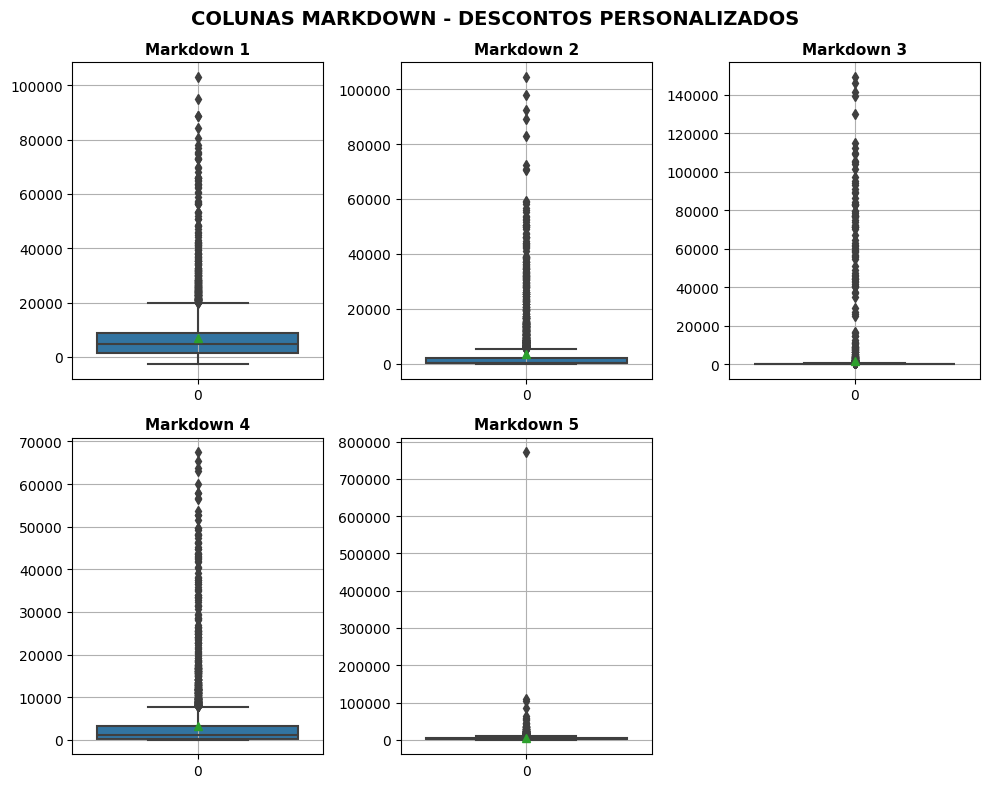

In [178]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8), tight_layout=True)
sns.boxplot(features['MarkDown1'], showmeans=True, ax=ax[0][0])
sns.boxplot(features['MarkDown2'], showmeans=True, ax=ax[0][1])
sns.boxplot(features['MarkDown3'], showmeans=True, ax=ax[0][2])
sns.boxplot(features['MarkDown4'], showmeans=True, ax=ax[1][0])
sns.boxplot(features['MarkDown5'], showmeans=True, ax=ax[1][1])
ax[1][2].axis('off')

ax[0][0].grid()
ax[0][1].grid()
ax[0][2].grid()
ax[1][0].grid()
ax[1][1].grid()

ax[0][0].set_title("Markdown 1", fontweight='bold', fontsize=11)
ax[0][1].set_title("Markdown 2", fontweight='bold', fontsize=11)
ax[0][2].set_title("Markdown 3", fontweight='bold', fontsize=11)
ax[1][0].set_title("Markdown 4", fontweight='bold', fontsize=11)
ax[1][1].set_title("Markdown 5", fontweight='bold', fontsize=11)

plt.suptitle('COLUNAS MARKDOWN - DESCONTOS PERSONALIZADOS', fontsize=14, fontweight='bold')
plt.savefig("../Imagens/markdown.png")
plt.show()

C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

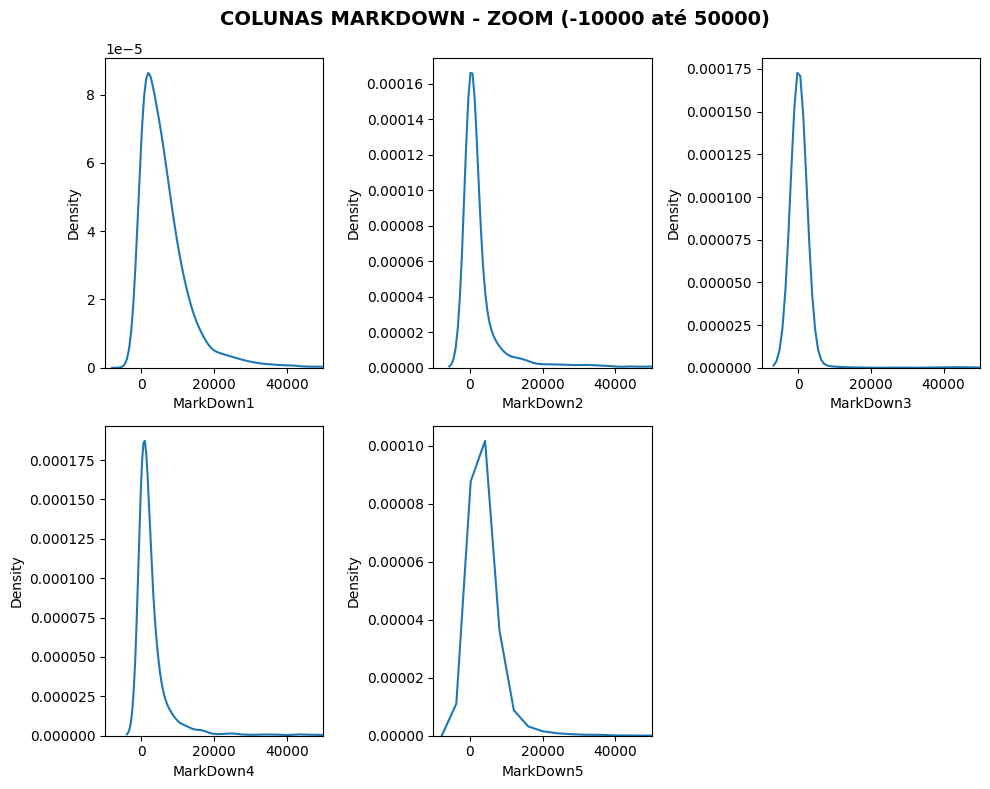

In [179]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8), tight_layout=True)

sns.kdeplot(features['MarkDown1'], ax=ax[0][0])
sns.kdeplot(features['MarkDown2'], ax=ax[0][1])
sns.kdeplot(features['MarkDown3'], ax=ax[0][2])
sns.kdeplot(features['MarkDown4'], ax=ax[1][0])
sns.kdeplot(features['MarkDown5'], ax=ax[1][1])

ax[0][0].set_xlim([-10000,50000])
ax[0][1].set_xlim([-10000,50000])
ax[0][2].set_xlim([-10000,50000])
ax[1][0].set_xlim([-10000,50000])
ax[1][1].set_xlim([-10000,50000])

ax[1][2].axis('off')

plt.suptitle('COLUNAS MARKDOWN - ZOOM (-10000 até 50000)', fontsize=14, fontweight='bold')
plt.savefig("../Imagens/markdown_2.png")
plt.show()

#### **Registros por loja**

In [180]:
print(features['Store'].value_counts().min())
print(features['Store'].value_counts().max())

182
182


In [181]:
base.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0


#### **Mesclando informações de lojas na base de treino**

In [182]:
base = pd.merge(base, lojas, on='Store', how='left')

In [183]:
base

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,0,A,151315
1,1,1,2010-02-12,46039.49,1,A,151315
2,1,1,2010-02-19,41595.55,0,A,151315
3,1,1,2010-02-26,19403.54,0,A,151315
4,1,1,2010-03-05,21827.90,0,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,B,118221
421566,45,98,2012-10-05,628.10,0,B,118221
421567,45,98,2012-10-12,1061.02,0,B,118221
421568,45,98,2012-10-19,760.01,0,B,118221


In [184]:
base.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

In [185]:
base['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

**Temos a maioria dos registros sendo de lojas do tipo A**

In [186]:
base.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
          ...     
51       21.931729
39       11.123750
78        7.296638
43        1.193333
47       -7.682554
Name: Weekly_Sales, Length: 81, dtype: float64

In [187]:
base['Dept'].value_counts()

Dept
1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: count, Length: 81, dtype: int64

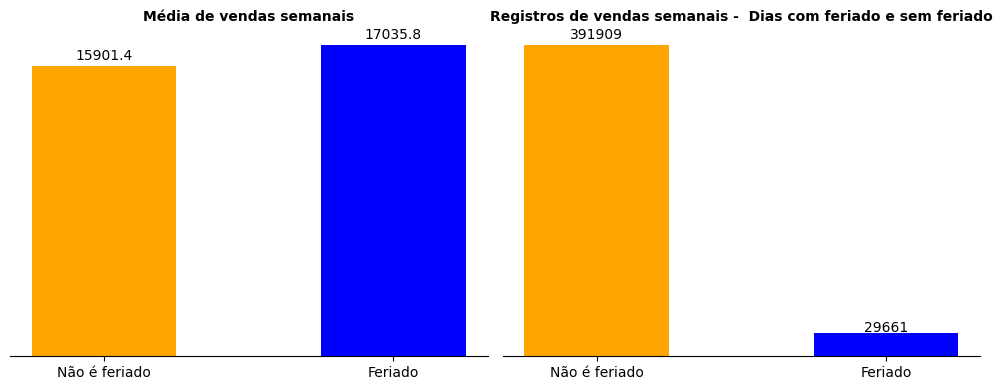

In [188]:
a = base.groupby('IsHoliday')['Weekly_Sales'].mean()
b = base.IsHoliday.value_counts()
w = 0.5
fig,ax = plt.subplots(ncols=2, figsize=(10,4), tight_layout=True)
ax[0].bar(a.index, a.values, width=w, color=['orange','blue'])
ax[1].bar(b.index, b.values, width=w, color=['orange','blue'])

ax[0].set_xticks(range(2))
ax[0].set_xticklabels(['Não é feriado','Feriado'])
ax[0].set_title('Média de vendas semanais',fontsize=10, fontweight='bold')
ax[0].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)

for i in range(2):
    ax[0].annotate(round(a.values[i],1),(a.index[i], a.values[i]+a.values[i]*0.02), ha='center')
    
ax[1].set_xticks(range(2))
ax[1].set_xticklabels(['Não é feriado','Feriado'])
ax[1].set_title('Registros de vendas semanais -  Dias com feriado e sem feriado',fontsize=10, fontweight='bold')
ax[1].spines[['top','left','right']].set_visible(False)
ax[1].yaxis.set_visible(False)

for i in range(2):
    ax[1].annotate(round(b.values[i],1),(b.index[i], b.values[i]+b.values[i]*0.02), ha='center')

plt.savefig("../Imagens/vendas_semanais.png")
plt.show()

#### **Criando flags para as colunas de desconto**

In [189]:
features['Flag_MarkDown1'] = features['MarkDown1'].apply(lambda x:1 if x > 0 else 0)
features['Flag_MarkDown2'] = features['MarkDown2'].apply(lambda x:1 if x > 0 else 0)
features['Flag_MarkDown3'] = features['MarkDown3'].apply(lambda x:1 if x > 0 else 0)
features['Flag_MarkDown4'] = features['MarkDown4'].apply(lambda x:1 if x > 0 else 0)
features['Flag_MarkDown5'] = features['MarkDown5'].apply(lambda x:1 if x > 0 else 0)

In [190]:
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,0,0,0,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,0,0,0,0,0
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,0,0,0,0,0


In [191]:
# Substiuind valores nulos por 0
features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = features[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [192]:
# Verificando valores nulos
features.isnull().sum()

Store               0
Date                0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI               585
Unemployment      585
IsHoliday           0
Flag_MarkDown1      0
Flag_MarkDown2      0
Flag_MarkDown3      0
Flag_MarkDown4      0
Flag_MarkDown5      0
dtype: int64

In [193]:
base.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.5,0,A,151315


In [194]:
features.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,0,0,0,0


In [195]:
lojas.head(1)

,Store,Type,Size
0,1,A,151315


In [196]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Store           8190 non-null   int64         
 1   Date            8190 non-null   datetime64[ns]
 2   Temperature     8190 non-null   float64       
 3   Fuel_Price      8190 non-null   float64       
 4   MarkDown1       8190 non-null   float64       
 5   MarkDown2       8190 non-null   float64       
 6   MarkDown3       8190 non-null   float64       
 7   MarkDown4       8190 non-null   float64       
 8   MarkDown5       8190 non-null   float64       
 9   CPI             7605 non-null   float64       
 10  Unemployment    7605 non-null   float64       
 11  IsHoliday       8190 non-null   int64         
 12  Flag_MarkDown1  8190 non-null   int64         
 13  Flag_MarkDown2  8190 non-null   int64         
 14  Flag_MarkDown3  8190 non-null   int64         
 15  Flag

In [197]:
features['Day'] = features['Date'].dt.day
features['Month'] = features['Date'].dt.month
features['Year'] = features['Date'].dt.year

In [198]:
features.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,0,0,0,0,5,2,2010


In [199]:
features = pd.merge(features, lojas[['Store','Type']], on = 'Store', how='left')

In [200]:
with pd.option_context("display.max_columns",50):
    display(features.head(3))

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,0,0,0,0,5,2,2010,A
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0,0,0,0,12,2,2010,A
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,0,0,0,0,19,2,2010,A


#### **Analisando a temperatura**

C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


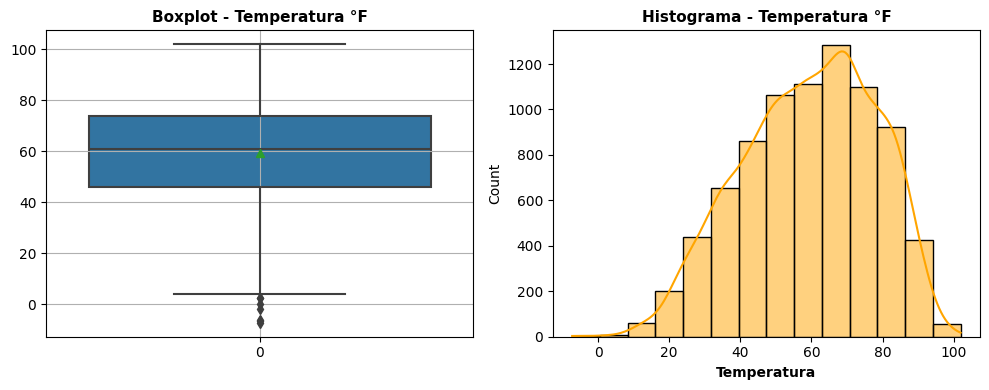

In [201]:
fig,ax = plt.subplots(ncols=2,figsize=(10,4), tight_layout=True)
sns.boxplot(features['Temperature'], showmeans=True, ax=ax[0])
ax[0].grid()
ax[0].set_title("Boxplot - Temperatura °F", fontweight='bold', fontsize=11)

sns.histplot(features['Temperature'], bins='sturges', ax=ax[1], kde=True, color='orange')
ax[1].set_title("Histograma - Temperatura °F", fontweight='bold', fontsize=11)

ax[1].set_xlabel("Temperatura", fontweight='bold')

plt.savefig("../Imagens/temperatura.png")
plt.show()

**Como podemos ver acima, a média está próxima a 60°F e os valores estão distribuidos semelhantes a uma distribuição normal**

In [202]:
print("Temperatura mínima:    ", features.Temperature.min())
print("Temperatura máxima:    ", features.Temperature.max())
print("Temperatura mediana:   ", features.Temperature.median())
print("Temperatura média:     ", round(features.Temperature.mean(),2))

Temperatura mínima:     -7.29
Temperatura máxima:     101.95
Temperatura mediana:    60.71
Temperatura média:      59.36


#### **Criando agrupamentos para as temperaturas**

In [203]:
features['Agrupamento_temperatura'] = pd.cut(features['Temperature'], 
                                              bins=[features.Temperature.min(), 20, 40, 60, 80, features.Temperature.max()],
                                              labels = ['min - 19.99','20 - 39.99','40 - 59.99','60 - 79.99','80 - max'],
                                              include_lowest=True)

In [204]:
features.query('Temperature > 79 and Temperature < 81')[['Temperature','Agrupamento_temperatura']].head(10)

,Temperature,Agrupamento_temperatura
16,80.44,80 - max
17,80.69,80 - max
18,80.43,80 - max
21,80.91,80 - max
22,80.48,80 - max
33,80.94,80 - max
84,79.94,60 - 79.99
86,79.69,60 - 79.99
123,79.35,60 - 79.99
128,80.42,80 - max


In [205]:
features.Agrupamento_temperatura.value_counts()

Agrupamento_temperatura
60 - 79.99     2947
40 - 59.99     2588
20 - 39.99     1283
80 - max       1241
min - 19.99     131
Name: count, dtype: int64

In [206]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type,Agrupamento_temperatura
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,0,0,0,5,2,2010,A,40 - 59.99
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,0,0,0,0,0,12,2,2010,A,20 - 39.99
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,0,0,0,0,0,19,2,2010,A,20 - 39.99
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,0,0,0,0,0,26,2,2010,A,40 - 59.99
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,0,0,0,0,0,5,3,2010,A,40 - 59.99


In [207]:
features.isnull().sum()

Store                        0
Date                         0
Temperature                  0
Fuel_Price                   0
MarkDown1                    0
MarkDown2                    0
MarkDown3                    0
MarkDown4                    0
MarkDown5                    0
CPI                        585
Unemployment               585
IsHoliday                    0
Flag_MarkDown1               0
Flag_MarkDown2               0
Flag_MarkDown3               0
Flag_MarkDown4               0
Flag_MarkDown5               0
Day                          0
Month                        0
Year                         0
Type                         0
Agrupamento_temperatura      0
dtype: int64

#### **Podemos tratar os valores nulos acima da seguinte forma:**
- Não posso simplemente zerar essas colunas, pois não faria sentido ter uma taxa de desemprego de 0 e na semana seguinte em 8, por exemplo.
- Não posso simplesmente apagar esses registros, pois as informações das linha são importantes
- Uma alternativa é pegar a média entre o valor anterior e seguinte. Assim, não ficaria algo muito discrepamente da realidade.

In [208]:
with pd.option_context('display.max_columns',50):
    display(features.query("Unemployment.isnull()").head())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type,Agrupamento_temperatura
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,0,1,1,1,1,1,3,5,2013,A,60 - 79.99
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,0,1,1,1,1,1,10,5,2013,A,60 - 79.99
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,0,1,1,1,1,1,17,5,2013,A,60 - 79.99
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,0,1,1,1,1,1,24,5,2013,A,60 - 79.99
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,0,1,1,1,1,1,31,5,2013,A,60 - 79.99


In [209]:
with pd.option_context('display.max_columns',50):
    display(features.query("Unemployment.isnull()").tail())

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type,Agrupamento_temperatura
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,0,1,1,1,1,1,28,6,2013,B,60 - 79.99
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,0,1,1,1,1,1,5,7,2013,B,60 - 79.99
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,0,1,1,1,1,1,12,7,2013,B,60 - 79.99
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,0,1,1,1,1,1,19,7,2013,B,80 - max
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,0,1,1,1,1,1,26,7,2013,B,60 - 79.99


**Porém, temos um problema: os valores nulos estão em sequencia, assim não é possivel pegar valores anteriores e posteriores**
- Com isso, vou aplicar a média do ano nesses valores nulos

In [210]:
features['Unemployment'] = features.Unemployment.fillna(features.groupby(['Year'])['Unemployment'].transform('mean'))

In [211]:
features['Unemployment'].tail()

8185    6.839456
8186    6.839456
8187    6.839456
8188    6.839456
8189    6.839456
Name: Unemployment, dtype: float64

#### **Agora para a coluna "CPI"**

In [212]:
features['CPI'] = features.CPI.fillna(features.groupby(['Year'])['CPI'].transform('mean'))

In [213]:
features['CPI'].tail()

8185    177.608807
8186    177.608807
8187    177.608807
8188    177.608807
8189    177.608807
Name: CPI, dtype: float64

In [214]:
features['CPI'].head()

0    211.096358
1    211.242170
2    211.289143
3    211.319643
4    211.350143
Name: CPI, dtype: float64

In [215]:
features.isnull().sum()

Store                      0
Date                       0
Temperature                0
Fuel_Price                 0
MarkDown1                  0
MarkDown2                  0
MarkDown3                  0
MarkDown4                  0
MarkDown5                  0
CPI                        0
Unemployment               0
IsHoliday                  0
Flag_MarkDown1             0
Flag_MarkDown2             0
Flag_MarkDown3             0
Flag_MarkDown4             0
Flag_MarkDown5             0
Day                        0
Month                      0
Year                       0
Type                       0
Agrupamento_temperatura    0
dtype: int64

**Data cleaning concluido na base de recursos!**

## **Base de treino**

In [216]:
base.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.5,0,A,151315


In [217]:
lojas.head(1)

,Store,Type,Size
0,1,A,151315


In [218]:
with pd.option_context('display.max_columns',50):
    display(features.head(3))

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type,Agrupamento_temperatura
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,0,0,0,0,5,2,2010,A,40 - 59.99
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0,0,0,0,12,2,2010,A,20 - 39.99
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,0,0,0,0,19,2,2010,A,20 - 39.99


In [219]:
treino = base.copy()

In [220]:
treino = pd.merge(treino, features[['Store','Date','Temperature','Fuel_Price','Unemployment','Agrupamento_temperatura']],
                  on = ['Store','Date'], how='left')

In [221]:
treino.isnull().sum()

Store                      0
Dept                       0
Date                       0
Weekly_Sales               0
IsHoliday                  0
Type                       0
Size                       0
Temperature                0
Fuel_Price                 0
Unemployment               0
Agrupamento_temperatura    0
dtype: int64

In [222]:
treino.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,Unemployment,Agrupamento_temperatura
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,8.106,40 - 59.99
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,8.106,20 - 39.99
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,8.106,20 - 39.99
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,8.106,40 - 59.99
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,8.106,40 - 59.99


## **Criando visualizações por Tipo de loja**

In [223]:
tipo_a = treino.loc[treino.Type == 'A'].copy()
tipo_b = treino.loc[treino.Type == 'B'].copy()
tipo_c = treino.loc[treino.Type == 'C'].copy()

In [224]:
tipo_a.shape, tipo_b.shape, tipo_c.shape

((215478, 11), (163495, 11), (42597, 11))

#### **TIPO A**

In [225]:
datas_tipo_a = tipo_a.copy()
datas_tipo_a = datas_tipo_a.set_index('Date')

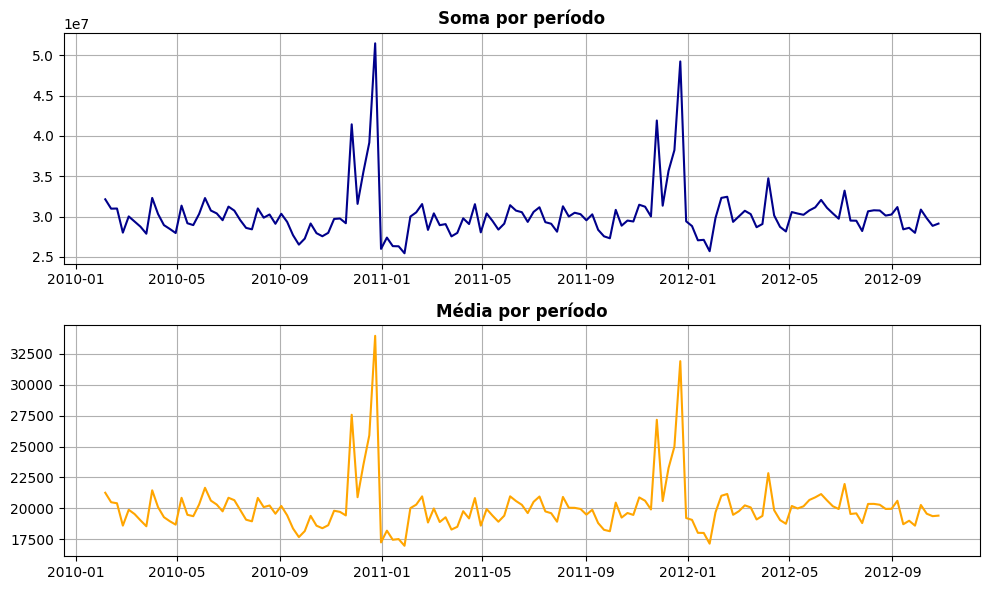

In [226]:
a = datas_tipo_a.groupby(datas_tipo_a.index)['Weekly_Sales'].sum()
a2 = datas_tipo_a.groupby(datas_tipo_a.index)['Weekly_Sales'].mean()

fig, ax = plt.subplots(nrows=2, figsize=(10,6), tight_layout=True)
ax[0].plot(a.index, a.values, color='darkblue')
ax[1].plot(a2.index, a2.values, color='orange')

ax[0].set_title("Soma por período", fontweight='bold')
ax[1].set_title("Média por período", fontweight='bold')

ax[0].grid()
ax[1].grid()

plt.show()

#### **TIPO B**

In [227]:
datas_tipo_b = tipo_b.copy()
datas_tipo_b = datas_tipo_b.set_index('Date')

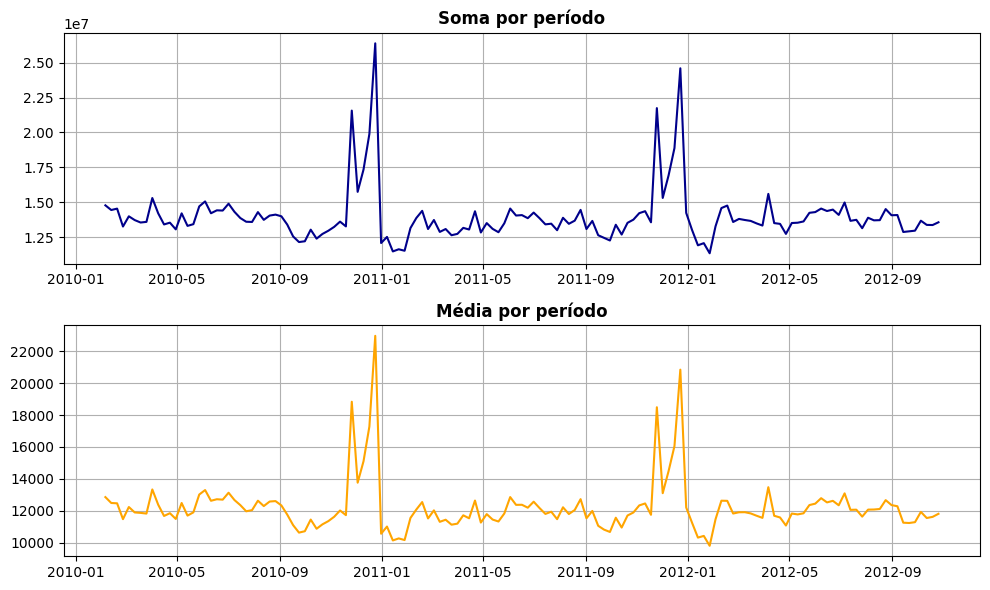

In [228]:
b = datas_tipo_b.groupby(datas_tipo_b.index)['Weekly_Sales'].sum()
b2 = datas_tipo_b.groupby(datas_tipo_b.index)['Weekly_Sales'].mean()

fig, ax = plt.subplots(nrows=2, figsize=(10,6), tight_layout=True)
ax[0].plot(b.index, b.values, color='darkblue')
ax[1].plot(b2.index, b2.values, color='orange')

ax[0].set_title("Soma por período", fontweight='bold')
ax[1].set_title("Média por período", fontweight='bold')

ax[0].grid()
ax[1].grid()

plt.show()

#### **TIPO C**

In [229]:
datas_tipo_c = tipo_c.copy()
datas_tipo_c = datas_tipo_c.set_index('Date')

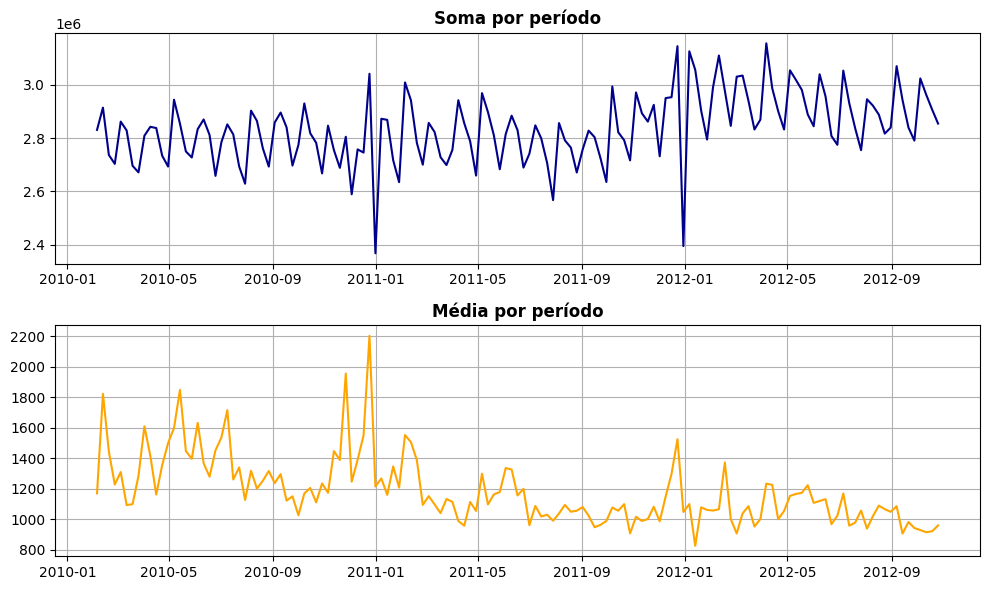

In [230]:
c = datas_tipo_c.groupby(datas_tipo_c.index)['Weekly_Sales'].sum()
c2 = datas_tipo_c.groupby(datas_tipo_c.index)['Weekly_Sales'].median()

fig, ax = plt.subplots(nrows=2, figsize=(10,6), tight_layout=True)
ax[0].plot(c.index, c.values, color='darkblue')
ax[1].plot(c2.index, c2.values, color='orange')

ax[0].set_title("Soma por período", fontweight='bold')
ax[1].set_title("Média por período", fontweight='bold')

ax[0].grid()
ax[1].grid()

plt.show()

#### **Todos os períodos**

In [231]:
treino2 = treino.copy()
treino2 = treino2.set_index('Date')

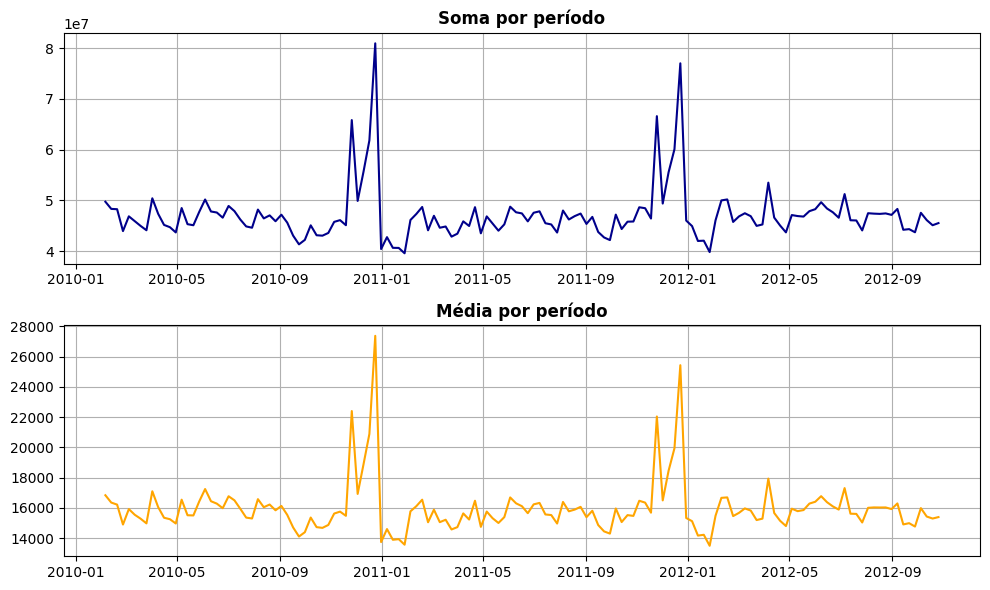

In [232]:
d = treino2.groupby(treino2.index)['Weekly_Sales'].sum()
d2 = treino2.groupby(treino2.index)['Weekly_Sales'].mean()

fig, ax = plt.subplots(nrows=2, figsize=(10,6), tight_layout=True)
ax[0].plot(d.index, d.values, color='darkblue')
ax[1].plot(d2.index, d2.values, color='orange')

ax[0].set_title("Soma por período", fontweight='bold')
ax[1].set_title("Média por período", fontweight='bold')

ax[0].grid()
ax[1].grid()

plt.show()

Optei por colocar a mediana também, pois pode ser que em um mes especifico apenas uma loja regisrou os valores, e isso fez com que a soma quando comparadas as outras fosse bem diferente. Colocando a média também, podemos ter uma noção diferente.

In [233]:
treino['Day'] = treino['Date'].dt.day
treino['Month'] = treino['Date'].dt.month
treino['Year'] = treino['Date'].dt.year

In [234]:
analise_a = treino.query('Month == 1 and Year == 2011 and Type == "A"')
analise_b = treino.query('Month == 1 and Year == 2011 and Type == "B"')
analise_c = treino.query('Month == 1 and Year == 2011 and Type == "C"')

mes_aleatorio_comparacao_a = treino.query('Month == 9 and Year == 2011 and Type == "A"')
mes_aleatorio_comparacao_b = treino.query('Month == 9 and Year == 2011 and Type == "B"')
mes_aleatorio_comparacao_c = treino.query('Month == 9 and Year == 2011 and Type == "C"')

In [235]:
analise_a.shape, analise_b.shape, analise_c.shape

((6018, 14), (4532, 14), (1145, 14))

In [236]:
mes_aleatorio_comparacao_a.shape, mes_aleatorio_comparacao_b.shape, mes_aleatorio_comparacao_c.shape

((7561, 14), (5713, 14), (1487, 14))

In [237]:
treino.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,Unemployment,Day,Month,Year
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358,136727.915739,60.090059,3.361027,7.960289,15.673131,6.449510,2010.968591
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,34875.000000,-2.060000,2.472000,3.879000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,93638.000000,46.680000,2.933000,6.891000,8.000000,4.000000,2010.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,140167.000000,62.090000,3.452000,7.866000,16.000000,6.000000,2011.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,202505.000000,74.280000,3.738000,8.572000,23.000000,9.000000,2012.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,219622.000000,100.140000,4.468000,14.313000,31.000000,12.000000,2012.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750,60980.583328,18.447931,0.458515,1.863296,8.753549,3.243217,0.796876


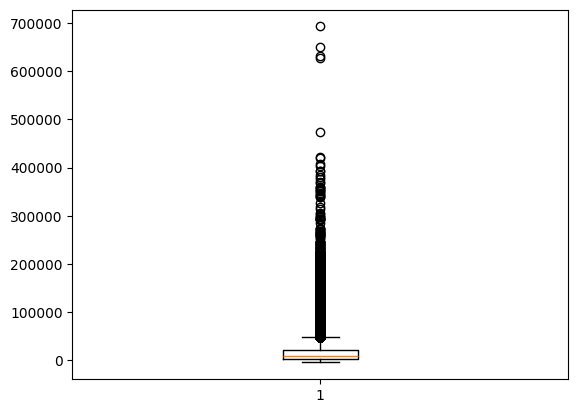

In [238]:
plt.boxplot(treino['Weekly_Sales'])
plt.show()

#### **Desses outliers (na questão estatística), vamos analisar os meses e anos de alguns**

In [239]:
analisar = treino.query("Weekly_Sales > 200000").copy()

In [240]:
analisar.groupby('Year')['Month'].value_counts()

Year  Month
2010  12       41
      11       30
      2         5
      3         1
      4         1
      5         1
      8         1
      9         1
      10        1
2011  11       36
      12       26
      2         4
      8         2
      3         1
      4         1
      9         1
      10        1
2012  2         3
      4         2
      1         1
      3         1
      5         1
      6         1
Name: count, dtype: int64

**Os meses que houveram esse aumento foram: Novembro e Dezembro!**

In [241]:
analisar.query("Month == 11 or Month == 12")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,Unemployment,Agrupamento_temperatura,Day,Month,Year
7741,1,72,2011-11-25,203670.47,1,A,151315,60.14,3.236,7.866,60 - 79.99,25,11,2011
11148,2,7,2010-12-24,264837.42,0,A,202307,49.97,2.886,8.163,40 - 59.99,24,12,2010
11200,2,7,2011-12-23,214118.51,0,A,202307,46.66,3.112,7.441,40 - 59.99,23,12,2011
17896,2,72,2010-11-26,285353.53,1,A,202307,62.98,2.735,8.163,60 - 79.99,26,11,2010
17900,2,72,2010-12-24,223396.79,0,A,202307,49.97,2.886,8.163,40 - 59.99,24,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368375,39,72,2010-11-26,339700.62,1,A,184109,67.75,2.735,8.476,60 - 79.99,26,11,2010
368427,39,72,2011-11-25,351553.98,1,A,184109,66.36,3.236,7.716,60 - 79.99,25,11,2011
388475,41,72,2010-11-26,290809.17,1,A,196321,25.30,2.742,7.508,20 - 39.99,26,11,2010
388527,41,72,2011-11-25,271392.45,1,A,196321,36.37,3.424,6.759,20 - 39.99,25,11,2011


#### **Acima de 200000**

In [242]:
analisar.IsHoliday.value_counts()

IsHoliday
0    97
1    66
Name: count, dtype: int64

#### **Uma quantidade considerável de dias são feriados, quando comparamos com a base toda**

In [243]:
treino.IsHoliday.value_counts()

IsHoliday
0    391909
1     29661
Name: count, dtype: int64

## **Analisando o Tipo C**

In [244]:
tipo_a = treino.loc[treino.Type == 'A'].copy()
tipo_b = treino.loc[treino.Type == 'B'].copy()
tipo_c = treino.loc[treino.Type == 'C'].copy()

#### **Verificando possíveis problemas de input**

In [245]:
tipo_c.Month.value_counts().head(5)

Month
4    4203
7    4187
3    3892
8    3891
6    3876
Name: count, dtype: int64

In [246]:
tipo_a.Month.value_counts().head(5)

Month
4     21122
7     20933
3     19645
9     19626
10    19567
Name: count, dtype: int64

In [247]:
tipo_b.Month.value_counts().head(5)

Month
4     16007
7     15860
10    14925
3     14914
9     14844
Name: count, dtype: int64

## **Criando insights**

In [248]:
features.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type,Agrupamento_temperatura
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,0,0,0,5,2,2010,A,40 - 59.99


In [249]:
treino.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,Unemployment,Agrupamento_temperatura,Day,Month,Year
0,1,1,2010-02-05,24924.5,0,A,151315,42.31,2.572,8.106,40 - 59.99,5,2,2010


In [250]:
lojas.head(1)

,Store,Type,Size
0,1,A,151315


### **Analisando as flags de descontos**

In [251]:
with pd.option_context("display.max_columns", 50):
    display(features.head(3))

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Flag_MarkDown1,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type,Agrupamento_temperatura
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,0,0,0,0,5,2,2010,A,40 - 59.99
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,0,0,0,0,0,12,2,2010,A,20 - 39.99
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,0,0,0,0,19,2,2010,A,20 - 39.99


In [252]:
features['Total_Flags_MarkDown'] = features['Flag_MarkDown1'] + features['Flag_MarkDown2'] + features['Flag_MarkDown3'] + features['Flag_MarkDown4'] + features['Flag_MarkDown5']

In [253]:
print("Mínimo de flags totais:           ", features['Total_Flags_MarkDown'].min())
print("Máximoo de flags totais:          ", features['Total_Flags_MarkDown'].max())
print("Média de flags totais:            ", features['Total_Flags_MarkDown'].mean())
print("Mediana de flags totais:          ", features['Total_Flags_MarkDown'].median())
print("Desvio padrão de flags totais:    ", features['Total_Flags_MarkDown'].std())

Mínimo de flags totais:            0
Máximoo de flags totais:           5
Média de flags totais:             2.201709401709402
Mediana de flags totais:           0.0
Desvio padrão de flags totais:     2.2972631560414483


C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


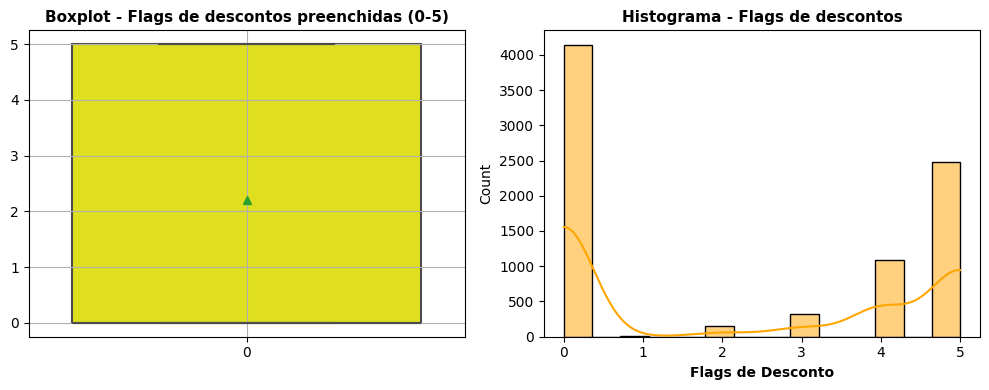

In [254]:
fig,ax = plt.subplots(ncols=2,figsize=(10,4), tight_layout=True)
sns.boxplot(features['Total_Flags_MarkDown'], showmeans=True, ax=ax[0], color='yellow')
ax[0].grid()
ax[0].set_title("Boxplot - Flags de descontos preenchidas (0-5)", fontweight='bold', fontsize=11)

sns.histplot(features['Total_Flags_MarkDown'], bins='sturges', ax=ax[1], kde=True, color='orange')
ax[1].set_title("Histograma - Flags de descontos", fontweight='bold', fontsize=11)
ax[1].set_xlabel("Flags de Desconto", fontweight='bold')

plt.savefig("../Imagens/descontos.png")
plt.show()

### **Analisando o peso da presença das colunas Markdown nos valores vendidos das semanas**

In [255]:
treino = pd.merge(treino, features[['Store','Date','Total_Flags_MarkDown']], on=['Store','Date'], how='left')

In [256]:
treino.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,Unemployment,Agrupamento_temperatura,Day,Month,Year,Total_Flags_MarkDown
421567,45,98,2012-10-12,1061.02,0,B,118221,54.47,4.000,8.667,40 - 59.99,12,10,2012,4
421568,45,98,2012-10-19,760.01,0,B,118221,56.47,3.969,8.667,40 - 59.99,19,10,2012,4
421569,45,98,2012-10-26,1076.80,0,B,118221,58.85,3.882,8.667,40 - 59.99,26,10,2012,5


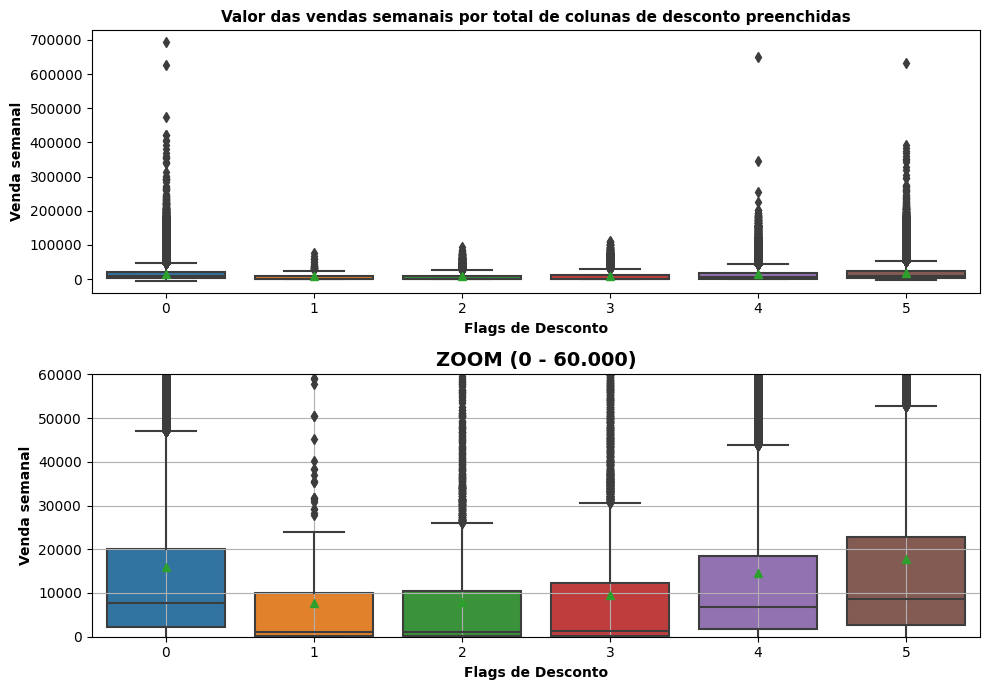

In [257]:
fig,ax = plt.subplots(nrows=2, figsize=(10,7), tight_layout=True)

sns.boxplot(x=treino['Total_Flags_MarkDown'],y=treino['Weekly_Sales'], showmeans=True, ax=ax[0])
ax[0].set_title("Valor das vendas semanais por total de colunas de desconto preenchidas", fontweight='bold', fontsize=11)


sns.boxplot(x=treino['Total_Flags_MarkDown'],y=treino['Weekly_Sales'], showmeans=True, ax=ax[1])
ax[1].grid()
ax[1].set_title("ZOOM (0 - 60.000)", fontweight='bold', fontsize=14)
ax[1].set_ylim([0,60000])

ax[0].set_ylabel("Venda semanal", fontweight='bold')
ax[0].set_xlabel("Flags de Desconto", fontweight='bold')
ax[1].set_ylabel("Venda semanal", fontweight='bold')
ax[1].set_xlabel("Flags de Desconto", fontweight='bold')

plt.savefig("../Imagens/descontopreenchido.png")
plt.show()

### **Analisando o fator Temperatura**

C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


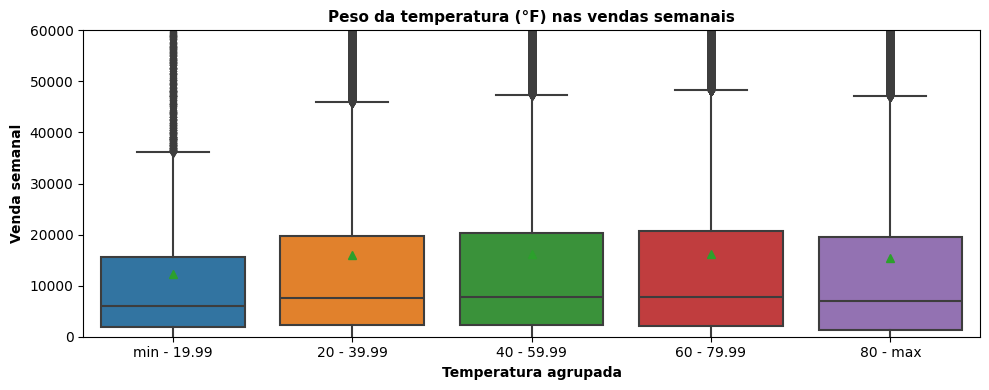

In [258]:
fig,ax = plt.subplots(figsize=(10,4), tight_layout=True)

sns.boxplot(x=treino['Agrupamento_temperatura'],y=treino['Weekly_Sales'], showmeans=True)
ax.set_ylim([0,60000])
ax.set_title("Peso da temperatura (°F) nas vendas semanais", fontweight='bold', fontsize=11)
ax.set_ylabel("Venda semanal", fontweight='bold')
ax.set_xlabel("Temperatura agrupada", fontweight='bold')
plt.savefig("../Imagens/temperatura2.png")
plt.show()

**Como podemos ver, a temperatura não é um fator que influencia consideravelmente nas vendas**

### **Analisando o fator Feriado**

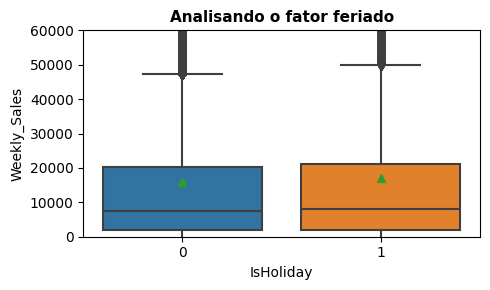

In [259]:
fig,ax = plt.subplots(figsize=(5,3), tight_layout=True)

sns.boxplot(y=treino['Weekly_Sales'],x=treino['IsHoliday'], showmeans=True)
ax.set_ylim([0,60000])
ax.set_title("Analisando o fator feriado", fontweight='bold', fontsize=11)

plt.savefig("../Imagens/feriadoo.png")
plt.show()

### **Analisando a coluna Size**

In [260]:
treino[['Size','Weekly_Sales']].corr()

,Size,Weekly_Sales
Size,1.000000,0.243828
Weekly_Sales,0.243828,1.000000


#### **Histplot dos valores da coluna "Size"**

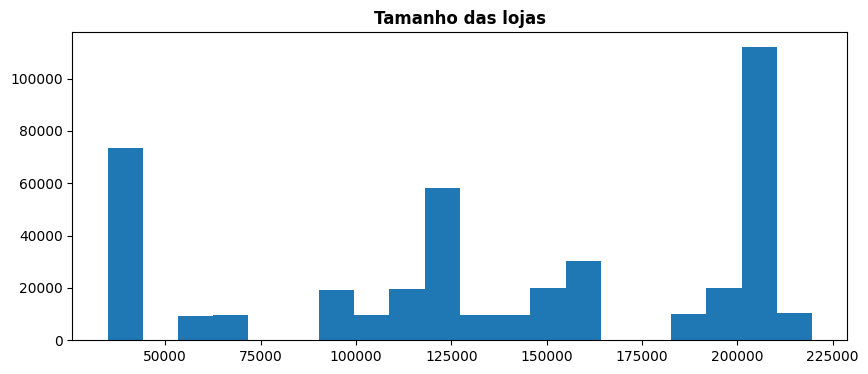

In [261]:
plt.figure(figsize=(10,4))
plt.hist(treino['Size'], bins=20)
plt.title("Tamanho das lojas", fontweight='bold')
plt.savefig("../Imagens/tamanholojas.png")
plt.show()

In [262]:
treino['Categ_Size'] = pd.cut(treino['Size'], bins=[10000, 50000, 80000, 110000, 140000, 170000, 200000, treino['Size'].max()],
                              labels = ['10000 - 49999','50000 - 79999','80000 - 109999','110000 - 139999','140000 - 169999','170000 - 199999','200000 - max'],
                                        include_lowest=True)
                                                    

C:\Users\thiag\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


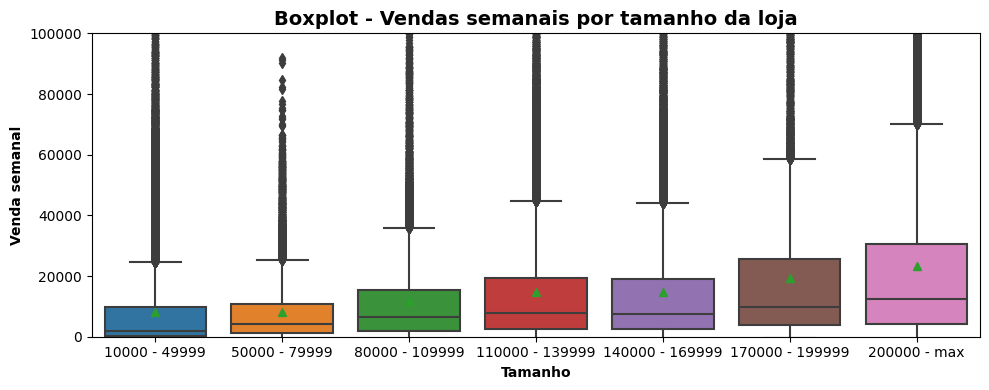

In [263]:
fig,ax = plt.subplots(figsize=(10,4), tight_layout=True)

sns.boxplot(x=treino['Categ_Size'],y=treino['Weekly_Sales'], showmeans=True)
ax.set_ylim([0,100000])
ax.set_title("Boxplot - Vendas semanais por tamanho da loja", fontsize=14, fontweight='bold')
ax.set_ylabel("Venda semanal", fontweight='bold')
ax.set_xlabel("Tamanho", fontweight='bold')
plt.savefig("../Imagens/vendaslojas")
plt.show()

#### **Exportando as bases**

In [264]:
# treino.to_csv('../Bases/base_treino_series_temporais.csv', index=False)
# features.to_csv('../Bases/features_1.csv', index=False)

## **Fatores temporais**

In [265]:
features.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Flag_MarkDown2,Flag_MarkDown3,Flag_MarkDown4,Flag_MarkDown5,Day,Month,Year,Type,Agrupamento_temperatura,Total_Flags_MarkDown
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,0,0,0,0,5,2,2010,A,40 - 59.99,0


In [266]:
lojas.head(1)

,Store,Type,Size
0,1,A,151315


In [267]:
treino.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,Unemployment,Agrupamento_temperatura,Day,Month,Year,Total_Flags_MarkDown,Categ_Size
0,1,1,2010-02-05,24924.5,0,A,151315,42.31,2.572,8.106,40 - 59.99,5,2,2010,0,140000 - 169999


#### **Correlação entre colunas**

In [268]:
col_num = treino.select_dtypes(include=['number'])

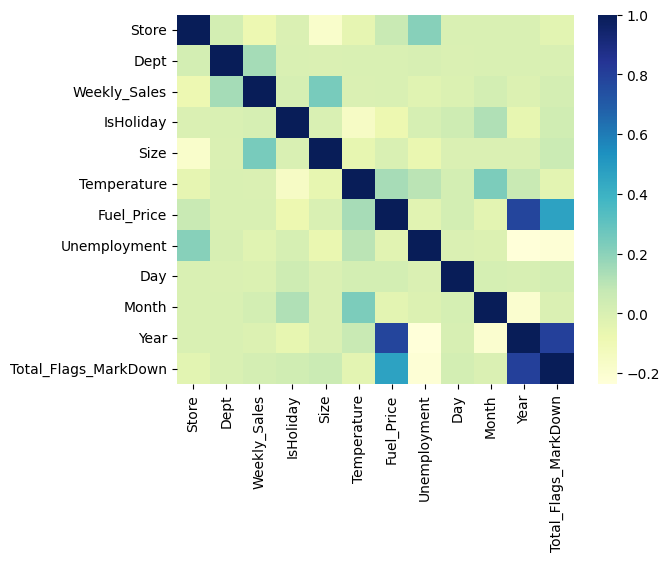

In [269]:
import seaborn as sns
sns.heatmap(col_num.corr(), cmap="YlGnBu")

plt.savefig("../Imagens/correlacoes.png")
plt.show()

### **Departamentos**

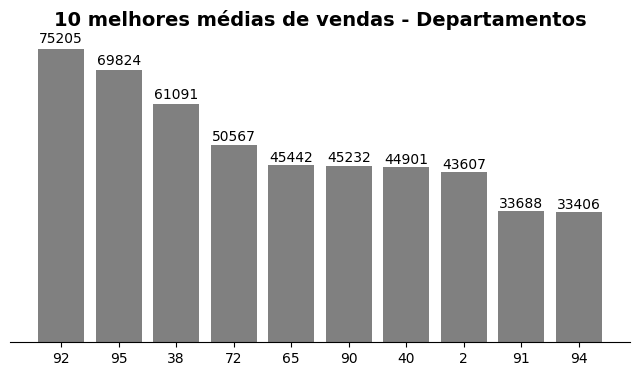

In [270]:
a = treino.groupby("Dept")['Weekly_Sales'].mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(a.index.astype(str),a.values, color='gray')
ax.yaxis.set_visible(False)
ax.spines[['top','left','right']].set_visible(False)
ax.set_title("10 melhores médias de vendas - Departamentos", fontsize=14, fontweight='bold')
for i in range(10):
  ax.annotate(int(round(a.values[i],0)),(i, a.values[i] + a.values[i] * 0.02), ha='center')
plt.savefig('../Imagens/10_dept.png')
plt.show()

In [271]:
treino.groupby("Dept")['Weekly_Sales'].mean().sort_values(ascending=True).head(5)

Dept
47    -7.682554
43     1.193333
78     7.296638
39    11.123750
51    21.931729
Name: Weekly_Sales, dtype: float64

**Há departamentos com médias muito baixas, e até negativas. Isso é um problema**

## **Analisando o departamento 47**

In [272]:
dept_47 = treino.query("Dept == 47").copy()

In [273]:
dept_47 = dept_47.groupby("Date")['Weekly_Sales'].mean()

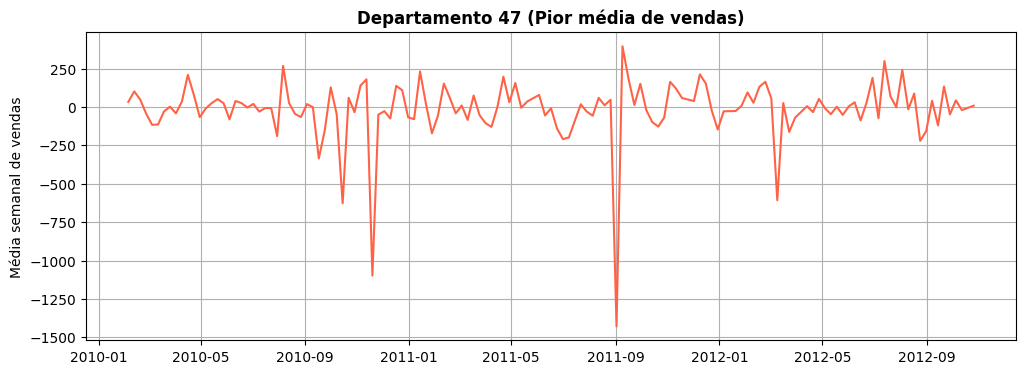

In [274]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(dept_47, color='tomato')
plt.title("Departamento 47 (Pior média de vendas)", fontweight='bold')
plt.ylabel("Média semanal de vendas")
plt.savefig("../Imagens/dept47.png")
plt.show()

**Com base em análise em departamentos, podemos criar analises de séries temporais, para um planejamento melhor de estoque e demanda, por exemplo.**